In [17]:
import dgl
import torch
import torch.nn as nn
import dgl.nn.pytorch as dglnn
import torch.nn.functional as F

In [2]:
g1 = dgl.graph(([0,1],[1,0]))
g1.ndata['h'] = th.tensor([1., 2.])
g2 = dgl.graph(([0, 1],[1, 2]))
g2.ndata['h'] = th.tensor([1., 2., 3.])

dgl.readout_nodes(g1, 'h') #summation aggregation  1+2

tensor([3.])

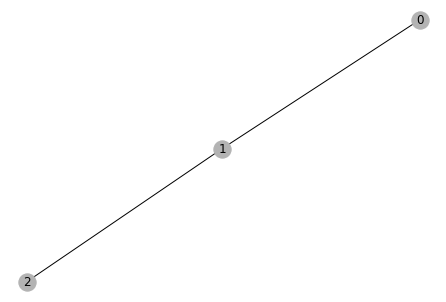

In [4]:
import networkx as nx

nx_G = g2.to_networkx().to_undirected() #转换成networkx格式的图
pos = nx.kamada_kawai_layout(nx_G)     #指定图的布局方式（kamada kawaii）
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [5]:
bg = dgl.batch([g1, g2])
dgl.readout_nodes(bg, 'h') # [1 + 2, 1+2+3]

tensor([3., 6.])

In [32]:
class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.conv1 = dglnn.GraphConv(in_dim, hidden_dim)
        self.conv2 = dglnn.GraphConv(hidden_dim, hidden_dim)
        self.classify = nn.Linear(hidden_dim, n_classes)
        
    def forward(self, g, feat):
        h = F.relu(self.conv1(g, feat))
        h = F.relu(self.conv2(g, h))
        with g.local_scope():
            g.ndata['h'] = h
            hg = dgl.mean_nodes(g, 'h')
            return self.classify(hg)

In [10]:
import dgl.data
dataset = dgl.data.GINDataset('MUTAG', False)

Extracting file to C:\Users\75100\.dgl\GINDataset


In [53]:
#这里要用dgl.batch对graph数据进行batch操作，不能用默认的collate函数

def collate(samples):
    graphs, labels = map(list, zip(*samples))
    #print(graphs[0])
    batched_graph = dgl.batch(graphs)
    batched_labels = th.tensor(labels)
    return batched_graph, batched_labels

In [46]:
from torch.utils.data import DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=1024,
    collate_fn=collate,
    drop_last=False,
    shuffle=True)


In [59]:
model = Classifier(7, 20, 5)
opt = th.optim.Adam(model.parameters())
for epoch in range(200):
    for batched_graph, labels in dataloader:
        print(batched_graph.ndata['label'].shape)
        feats = batched_graph.ndata['attr']
        feats = torch.tensor(feats, dtype=torch.float32)
        logits = model(batched_graph, feats)
        loss = F.cross_entropy(logits, labels)
        #print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))
        opt.zero_grad()
        loss.backward()
        opt.step()

Graph(num_nodes=13, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=16, num_edges=34,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=16, num_edges=34,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=13, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
 

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys



Graph(num_nodes=16, num_edges=34,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=17, num_edges=38,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=28, num_edges=66,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=10, num_edges=20,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=23, num_edges=54,


      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=19, num_edges=44,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=17, num_edges=38,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=13, num_edges=28,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=19, num_edges=44,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size(

torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=24,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=23, num_edges=54,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=

      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=20, num_edges=46,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=12, num_edges=26,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size(

torch.Size([3371])
Graph(num_nodes=11, num_edges=22,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=14, num_edges=28,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=19, num_edges=44,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=23, num_edges=54,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=25, num_edges=56,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float64)}
      edata_schemes={})
torch.Size([3371])
Graph(num_nodes=

In [60]:
print(g1)

Graph(num_nodes=2, num_edges=2,
      ndata_schemes={'h': Scheme(shape=(), dtype=torch.float32)}
      edata_schemes={})
